## Chatbots With Langgraph

In [1]:
!pip install langgraph langsmith

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.5/132.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.0 MB/s eta 0:00:00


In [2]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.2/122.2 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.6 MB/s eta 0:00:00


In [3]:
from google.colab import userdata
groq_api_key=userdata.get('GROQ_API_KEY')
langsmith=userdata.get('LANGSMITH_API_KEY')


In [4]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="CourseLanggraph"

In [5]:
from langchain_groq import ChatGroq

In [6]:
llm=ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7d786100e850>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7d78607d2190>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

## Start Building Chatbot Using Langgraph

In [7]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [8]:
class State(TypedDict):
  # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)


In [9]:
graph_builder

In [10]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [11]:
graph_builder.add_node("chatbot",chatbot)

In [12]:
graph_builder

In [13]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [14]:
graph=graph_builder.compile()

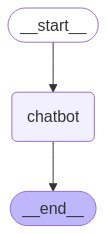

In [15]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [16]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

User: hey, how are you doing. what is the capital of france. and what is the capital of colombo
dict_values([{'messages': AIMessage(content='I\'m doing well, thank you! \n\n* The capital of France is **Paris**.\n* The capital of Colombo is a bit tricky! "Colombo" is the capital city of the **Sri Lanka**.  \n\n\nLet me know if you have any other questions! 😊 \n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 62, 'prompt_tokens': 31, 'total_tokens': 93, 'completion_time': 0.112727273, 'prompt_time': 0.002367786, 'queue_time': 0.017715714, 'total_time': 0.115095059}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-fb99f734-aa72-468c-b202-09c37ec692db-0', usage_metadata={'input_tokens': 31, 'output_tokens': 62, 'total_tokens': 93})}])
content='I\'m doing well, thank you! \n\n* The capital of France is **Paris**.\n* The capital of Colombo is a bit tricky! "Colombo" is the capital city of